In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

reloaded


# Feedback vs. no feedback

reloaded
d:\measuring\data\20160817\095152_SSRO_calib_MWInit_Pippin_SIL2_SSROCalibration_MWInit 0.9464 0.9976
2
starting fit.fit1d
Converged with chi squared  0.0355381791772
degrees of freedom, dof  27
RMS of residuals (i.e. sqrt(chisq/dof))  0.0362798685005
Reduced chisq (i.e. variance of residuals)  0.00131622885841

fitted parameters at minimum, with 68% C.I.:
 0 A              0.360338 +/-   0.010940
 1 T            242.359061 +/-  15.981691

correlation matrix:
               A         T         
         A  1.000000
         T -0.669419  1.000000

d:\measuring\data\20160817\135340_purifcation slave_Pippin_SIL2_ADwin_phase_compensation_Z


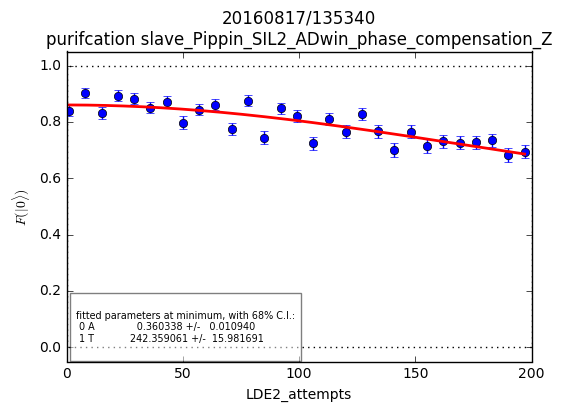

d:\measuring\data\20160817\095152_SSRO_calib_MWInit_Pippin_SIL2_SSROCalibration_MWInit 0.9464 0.9976
2
starting fit.fit1d
Converged with chi squared  0.0570055825911
degrees of freedom, dof  25
RMS of residuals (i.e. sqrt(chisq/dof))  0.0477516837781
Reduced chisq (i.e. variance of residuals)  0.00228022330364

fitted parameters at minimum, with 68% C.I.:
 0 A             -0.424236 +/-   0.020593
 1 T            273.355208 +/-  35.677240
 2 f              0.057252 +/-   0.000096
 3 phi          -49.510111 +/-   3.466657

correlation matrix:
               A         T         f         phi       
         A  1.000000
         T  0.691877  1.000000
         f -0.060491 -0.015479  1.000000
       phi  0.083858  0.042863 -0.826609  1.000000

d:\measuring\data\20160817\132707_purifcation slave_Pippin_SIL2_ADwin_phase_compensation_Z


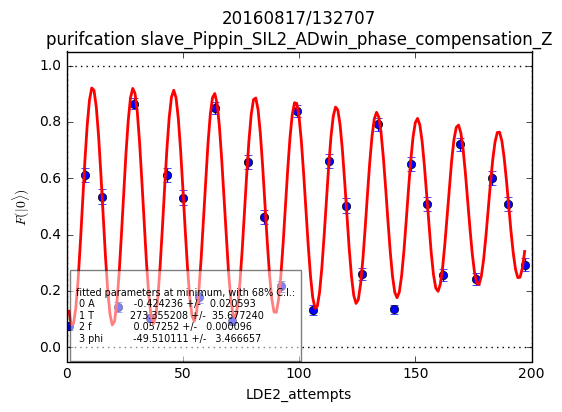

In [78]:
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)
####
#parameters / timestamps
ssro_tstamp = '20160817_095152'
tstamp_feedback = '20160817_135340'
tstamp_no_feedback = '20160817_132707'
####
Result_w_feedback = fits.exp_sin(timestamp=  tstamp_feedback,
                      offset=[0.5], amplitude = [0.5], center = [0], decay_constant = [300], 
                      exp_power = [2],
                      frequency = [0.], phase =[0], 
                      fixed = [0,2,4,5,6],
                      ylim = None,ssro_tstamp = ssro_tstamp,
                      plot_fit = True, do_print = True, show_guess = False)[0]
Result_wo_feedback = fits.exp_sin(timestamp=  tstamp_no_feedback,
                      offset=[0.5], amplitude = [0.5], center = [0], decay_constant = [300], 
                      exp_power = [2],
                      frequency = [0.04], phase =[0], 
                      fixed = [0,2,4],
                      ylim = None,ssro_tstamp = ssro_tstamp,
                      plot_fit = True, do_print = True, show_guess = False)[0]

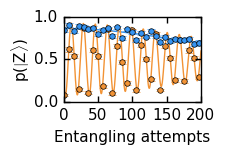

In [79]:
save_folder = r'K:\ns\qt\Diamond\Projects\Purification\Paper\Plots' 
golden_ratio = 1.61803
mm_to_inches = 0.0393701 ### inch/mm
figure_width = mm_to_inches*45
fig = plt.figure(figsize =(figure_width,figure_width/golden_ratio))
ax = plt.subplot(111)
x_wo_feed = np.linspace(Result_wo_feedback['x'][0],200,600)
x_w_feed = np.linspace(Result_w_feedback['x'][0],200,600)

### formatting
lw = 1
fontsize = 11
markersize = 4

col_w_feed = '#3594F2'
col_wo_feed = '#F29335'

ax.set_ylabel(r'p($|$Z$\rangle$)',size = fontsize)
ax.set_xlabel('Entangling attempts',size = fontsize)
# ax.set_xticklabels([0,20,40,60,80,100],size = fontsize)
ax.yaxis.set_ticks([0.0,0.5,1.0])
# ax.set_yticklabels([0.0,0.5,1.0])
ax.xaxis.set_tick_params(width=lw,labelsize = fontsize)
ax.yaxis.set_tick_params(width=lw,labelsize = fontsize)
# ax.set_xlim(0,100)
ax.set_ylim([0,1])
[i.set_linewidth(lw) for i in ax.spines.itervalues()]
ax.yaxis.set_label_coords(-0.23,0.5)
### commencde plotting
plt.plot(x_w_feed,Result_w_feedback['fitfunc'](x_w_feed),color = col_w_feed,lw=lw)
plt.plot(x_wo_feed,Result_wo_feedback['fitfunc'](x_wo_feed), color = col_wo_feed,lw = lw)
plt.errorbar(Result_wo_feedback['x'],Result_wo_feedback['y'],Result_wo_feedback['y_u'],fmt = 'o',color = col_wo_feed,ms = markersize,mew=lw/2.,elinewidth=lw)
plt.errorbar(Result_w_feedback['x'],Result_w_feedback['y'],Result_w_feedback['y_u'],fmt = 'o',color = col_w_feed,ms = markersize,mew=lw/2.,elinewidth=lw)
plt.savefig(os.path.join(save_folder,'feedback_nofeedback_LT3.png'),format='png',bbox_inches = 'tight',pad_inches=0.3)
plt.savefig(os.path.join(save_folder,'feedback_nofeedback_LT3.pdf'),format='pdf',bbox_inches = 'tight',pad_inches=0.3)

# Quantum Memory

In [80]:
#### compose the timestamps, used order is: X,mX,Y,mY,Z,mZ
### shown data is for pi/4
daystamp = '20160817'
LT3_tstamp_list = ['152340','152723','153300','155957','164644','165307']
LT3_tstamp_list = [daystamp+'_'+s for s in LT3_tstamp_list]
LT3_ssro = '20160817_095152'
LT4_tstamp_list = ['172831','173338','175151','175644','150853','151312']
LT4_tstamp_list = [daystamp+'_'+s for s in LT4_tstamp_list]
LT4_ssro = '20160817_094254'

In [84]:
reload(mbi)
def get_MBI_data(tstamp,ssrostamp):
    ### note that the data is not carbon read-out corrected.
    folder = tb.data_from_time(tstamp)
    ssro_folder = tb.data_from_time(ssrostamp)
    a = mbi.MBIAnalysis(folder)
    a.get_sweep_pts()
    a.get_readout_results(name='adwindata')
    a.get_electron_ROC(ssro_folder)
    
    return a.sweep_pts.reshape(-1)[:],a.p0.reshape(-1)[:],a.u_p0.reshape(-1)[:]

In [85]:
x_list,y_list,y_u_list = [],[],[]
for t in LT3_tstamp_list:
    x,y,y_u = get_MBI_data(t,LT3_ssro)
    x_list.append(x);y_list.append(y);y_u_list.append(y_u)
    
### calculate average state fidelity
avg_yXY = np.zeros(len(x_list[0]))
avg_yXY_u = np.zeros(len(x_list[0]))
avg_yZ = np.zeros(len(x_list[-1]))
avg_yZ_u = np.zeros(len(x_list[-1]))

## get the avg XY values
for y,y_u in zip(y_list[:-2],y_u_list[:-2]): ## we assume that all sweep points for all measurements are the same (could also write a function to check this...)
    avg_yXY = avg_yXY+(np.absolute(2*(y-0.5))/2+0.5)/4.
    avg_yXY_u = avg_yXY_u+y_u**2/16.

    ## get the avg Z values
for y,y_u in zip(y_list[-2:],y_u_list[-2:]): ## we assume that all sweep points for all measurements are the same (could also write a function to check this...)
    avg_yZ = avg_yZ+(np.absolute(2*(y-0.5))/2.+0.5)/2.
    avg_yZ_u = avg_yZ_u+y_u**2/4.    

avg_yXY_u = np.sqrt(avg_yXY_u)
avg_yZ_u = np.sqrt(avg_yZ_u)

In [86]:
### fit XY decay:
# p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.5, 0.45, 300);fixed = [0]
p0,fitfunc,fitfunc_str = common.fit_gauss(0.5,0.45,0,250);fixed = [0,2]
fit_result = fit.fit1d(x_list[0],avg_yXY, None, p0=p0, fitfunc=fitfunc, do_print=True, ret=True,fixed=fixed)
fit_x = np.linspace(x_list[0][0],x_list[0][-1],600)

Converged with chi squared  0.00495146017861
degrees of freedom, dof  15
RMS of residuals (i.e. sqrt(chisq/dof))  0.0181685812666
Reduced chisq (i.e. variance of residuals)  0.000330097345241

fitted parameters at minimum, with 68% C.I.:
 0 A              0.371386 +/-   0.008025
 1 sigma        174.265704 +/-   4.872462

correlation matrix:
               A         sigma     
         A  1.000000
     sigma -0.583573  1.000000



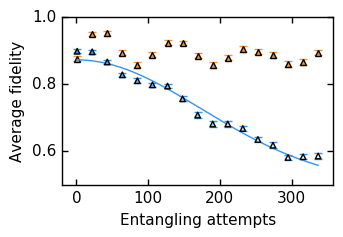

In [87]:
### plot decays
golden_ratio = 1.61803
mm_to_inches = 0.0393701 ### inch/mm
figure_width = mm_to_inches*89
fig = plt.figure(figsize =(figure_width,figure_width/golden_ratio))
ax = plt.subplot(111)
### formatting
lw = 1.
fontsize = 11.
markersize = 4.

### colors
col_XY = '#3594F2'
# green = np.array([79/255.,166/255.,58/255.]) ### the color col_XY expressed in RGB values
blue = np.array([53,148,242])/255.
green = blue
white = np.array([1,1,1])
x_max = x_list[0][-1]
col_Z = '#F29335' #242/147/53
orange_z = np.array([242,147,53])/255.
color_gradient = [(1-float(x)/x_max)*green+(float(x)/x_max)*white for x in x_list[0]]
color_gradient2 = [(1-float(x)/x_max)*orange_z+(float(x)/x_max)*orange_z for x in x_list[0]]

## apply formatting
ax.set_ylabel(r'Average fidelity',size = fontsize)
ax.set_xlabel('Entangling attempts',size = fontsize)
ax.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax.xaxis.set_ticks([0,100,200,300,400])
ax.tick_params(labelsize = fontsize,width =lw)
ax.set_ylim([0.5,1])
# ax.set_xlim([0,450])
[i.set_linewidth(lw) for i in ax.spines.itervalues()]


### implement color gradient


ax.scatter(x_list[0],avg_yXY, c=color_gradient, marker = '^',s=markersize**2, zorder=3,linewidths=lw)
ax.errorbar(x_list[0],avg_yXY,avg_yXY_u, zorder=0, fmt="none",marker="none",ecolor=col_XY,mew=lw)
ax.errorbar(x_list[-1],avg_yZ,avg_yZ_u,fmt = '^',ms = markersize,color=col_Z,mew=lw)
ax.plot(fit_x,fit_result['fitfunc'](fit_x),'-',color=blue,lw=lw)
# plt.savefig(os.path.join(save_folder,'memory_decay_LT3.png'),format='png',bbox_inches = 'tight',pad_inches=0.3)
# plt.savefig(os.path.join(save_folder,'memory_decay_LT3.pdf'),format='pdf',bbox_inches = 'tight',pad_inches=0.3)

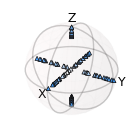

In [36]:
from analysis.lib.purification import blochsphere_qutip as bl; reload(bl)
### convert all y entries to bloch vector coordinates
bv_list = [2*(y-0.5) for y in y_list]


b = bl.Bloch(figsize=[1.2,1.2])

## X values
b.add_points([bv_list[0],np.zeros(len(bv_list[0])),np.zeros(len(bv_list[0]))])
b.add_points([bv_list[1],np.zeros(len(bv_list[1])),np.zeros(len(bv_list[1]))])
## Y values
b.add_points([np.zeros(len(bv_list[2])),bv_list[2],np.zeros(len(bv_list[2]))])
b.add_points([np.zeros(len(bv_list[3])),bv_list[3],np.zeros(len(bv_list[3]))])
## Z values
b.add_points([np.zeros(len(bv_list[4])),np.zeros(len(bv_list[4])),bv_list[4]])
b.add_points([np.zeros(len(bv_list[5])),np.zeros(len(bv_list[5])),bv_list[5]])

## styling
b.frame_alpha = 0.01
b.point_marker = '^'
b.point_color  = color_gradient
b.point_size   = [9]
b.xlabel = ["X",""]
b.ylabel = ["Y",""]
b.zlabel = ["Z",""]

b.save(name =os.path.join(save_folder,'bloch_LT3.pdf'),format = 'pdf') 
# b.save(name =os.path.join(save_folder,'bloch_LT4.png'),format = 'png')
# b.show()

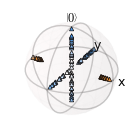

In [37]:
#### bloch sphere in the computational basis X --> Z!

from analysis.lib.purification import blochsphere_qutip as bl; reload(bl)
### convert all y entries to bloch vector coordinates
bv_list = [2*(y-0.5) for y in y_list]


b = bl.Bloch(figsize=[1.2,1.2])
# b = bl.Bloch(figsize=[3.2,3.2])
## X values
b.add_points([np.zeros(len(bv_list[0])),np.zeros(len(bv_list[0])),bv_list[0]],invert_colors = False)
b.add_points([np.zeros(len(bv_list[1])),np.zeros(len(bv_list[1])),bv_list[1][::-1]],invert_colors = True)
## Y values
b.add_points([-bv_list[2],np.zeros(len(bv_list[2]))[::-1],np.zeros(len(bv_list[2]))])
b.add_points([-bv_list[3][::-1],np.zeros(len(bv_list[3]))[::-1],np.zeros(len(bv_list[3]))[::-1]],invert_colors = True)
## Z values
b.add_points([np.zeros(len(bv_list[4])),-bv_list[4],np.zeros(len(bv_list[4]))],color2 = True,invert_colors = False)
b.add_points([np.zeros(len(bv_list[5])),-bv_list[5],np.zeros(len(bv_list[5]))],color2 = True,invert_colors = False)

## styling
b.frame_alpha = 0.01
b.point_marker = '^'
b.point_color  = color_gradient
b.point_color2 = color_gradient2
b.point_size   = [9]
b.zlabel = ["$\\left| \\mathrm{0}\\right>$",""]#["X",""]
b.ylabel = ["x",""]
b.xlabel = ["","y"]

b.save(name =os.path.join(save_folder,'bloch_LT3.pdf'),format = 'pdf') 
# b.save(name =os.path.join(save_folder,'bloch_LT4.png'),format = 'png')
# b.axes.scatter?
# b.show()
